In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_excel('Data.xlsx', index_col=0)
data.head(3)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

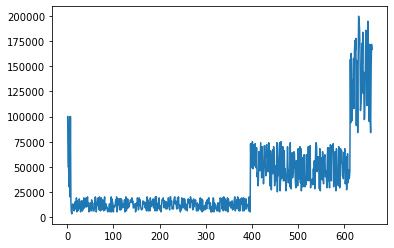

In [34]:
plt.plot(data.Avg_Credit_Limit)

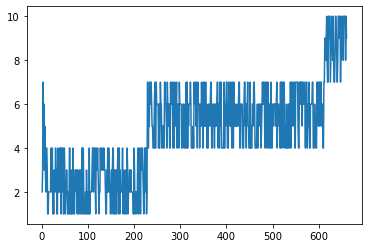

In [5]:
plt.plot(data.Total_Credit_Cards)

(array([100.,   0., 112.,   0., 158.,   0., 100.,   0.,  92.,  98.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

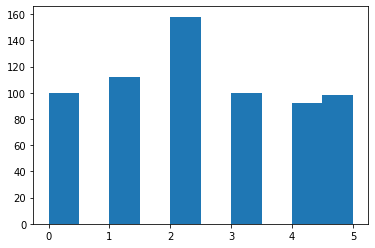

In [6]:
plt.hist(data.Total_visits_bank)

(array([253., 189., 113.,  54.,   8.,   6.,  10.,   5.,  11.,  11.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

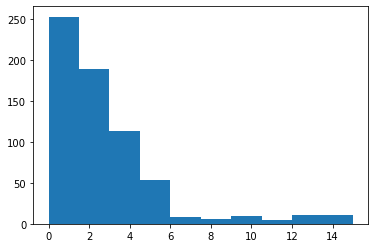

In [7]:
plt.hist(data.Total_visits_online)

(array([ 97.,  90.,  91.,  83., 108.,  29.,  39.,  35.,  30.,  58.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

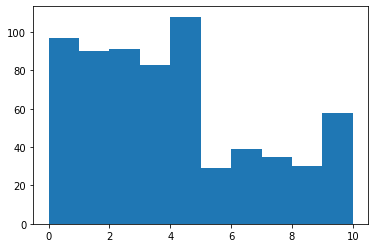

In [8]:
plt.hist(data.Total_calls_made)

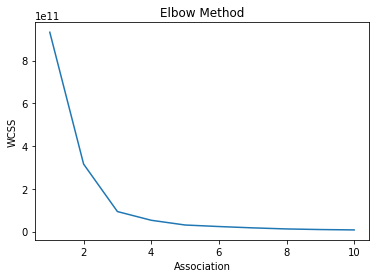

In [36]:
x = data.drop(['Customer Key'],axis=1)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(np.arange(1, 11, 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [37]:
data['Avg_Credit'] = data['Avg_Credit_Limit'].rank(method='dense').astype(int)
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit
Sl_No,,,,,,,
1,87073,100000,2,1,1,0,76
2,38414,50000,3,0,10,9,43
3,17341,50000,7,1,3,4,43
4,40496,30000,5,1,1,4,23
5,47437,100000,6,0,12,3,76


In [38]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
df_norm = StandardScaler().fit(data).transform(data)
X_tsne = TSNE(learning_rate=500, n_components=2).fit_transform(df_norm)

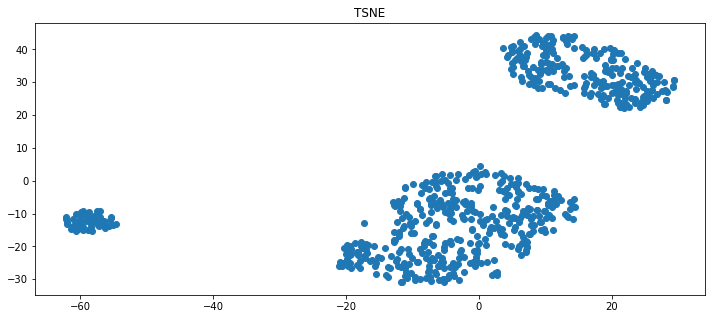

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
cmap = plt.get_cmap('flag')
xs =X_tsne[:,0]
ys=X_tsne[:,1]
plt.scatter(xs, ys)
plt.title('TSNE')
plt.show()

we can see that there are clearly some distinguish features that hinder our clustering process

In [40]:
x=data.drop(['Customer Key', 'Avg_Credit_Limit'], axis =1)
model3 = KMeans(n_clusters = 3, max_iter = 400, n_init = 10, random_state = 0)
model3.fit(df_norm)
y_kmeans = kmeans.fit_predict(df_norm)

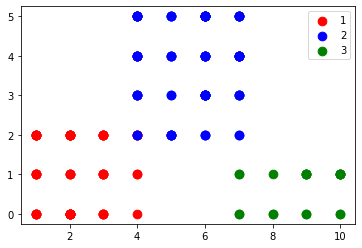

In [41]:
x=np.array(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = '1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = '2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = '3')

plt.legend()